In [1]:
import pandas as pd
import numpy as np


In [11]:
me_m = pd.read_csv('../data/Portfolios_Formed_on_ME_monthly_EW.csv', header=0, parse_dates=True, index_col=0, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']] / 100
rets.columns = ['SmallCap', 'LargeCap']
rets.index = pd.to_datetime(rets.index, format='%Y%m')
rets.index = rets.index.to_period('M')
rets.head()

/var/folders/qj/0m_9ythn431_06y4v80zxls00000gn/T/ipykernel_68855/2249061291.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m = pd.read_csv('../data/Portfolios_Formed_on_ME_monthly_EW.csv', header=0, parse_dates=True, index_col=0, na_values=-99.99)


,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


<Axes: title={'center': 'Monthly Returns: SmallCap vs LargeCap'}>

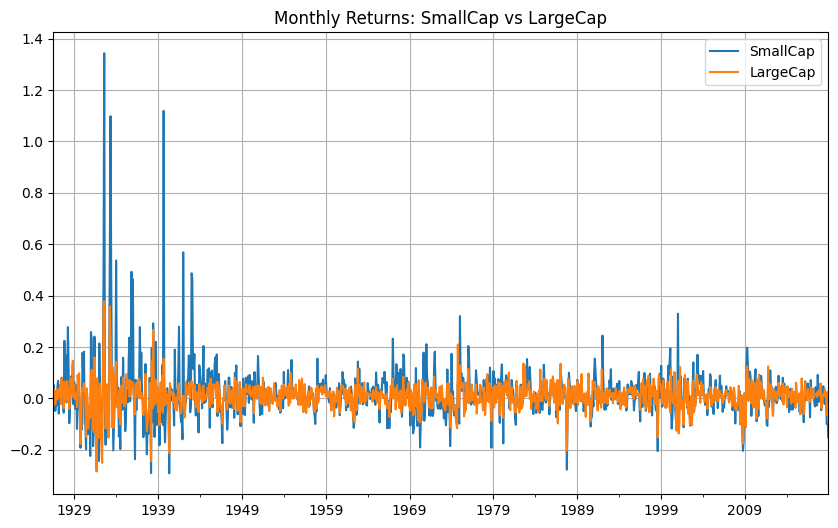

In [12]:
rets.plot.line(figsize=(10,6), title='Monthly Returns: SmallCap vs LargeCap', grid=True)

<Axes: title={'center': 'Wealth Index: SmallCap vs LargeCap'}>

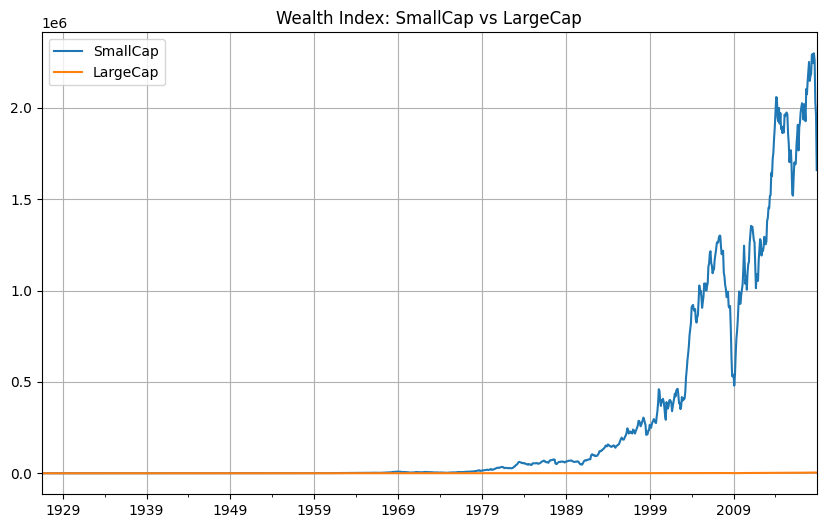

In [16]:
wealth_index = (1 + rets).cumprod()
wealth_index.plot.line(figsize=(10,6), title='Wealth Index: SmallCap vs LargeCap', grid=True)

<Axes: title={'center': 'Drawdowns: SmallCap vs LargeCap'}>

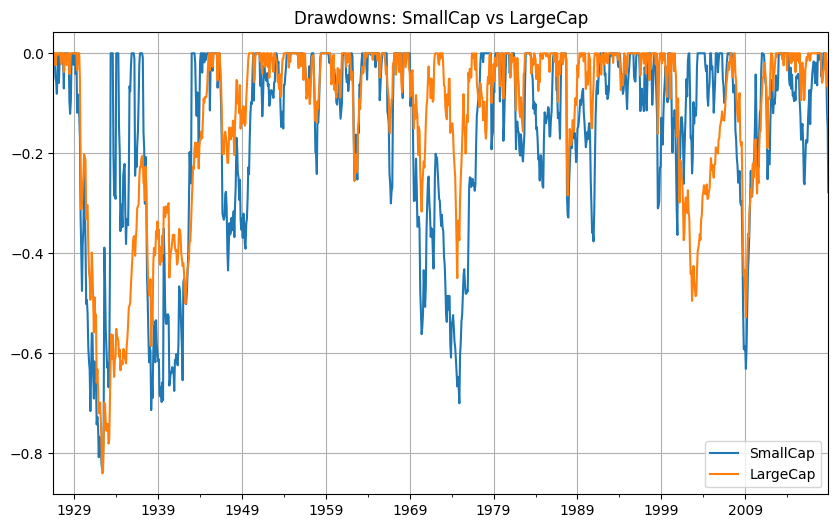

In [17]:
previous_peaks = wealth_index.cummax()
drawdowns = (wealth_index - previous_peaks) / previous_peaks
drawdowns.plot.line(figsize=(10,6), title='Drawdowns: SmallCap vs LargeCap', grid=True)

<Axes: >

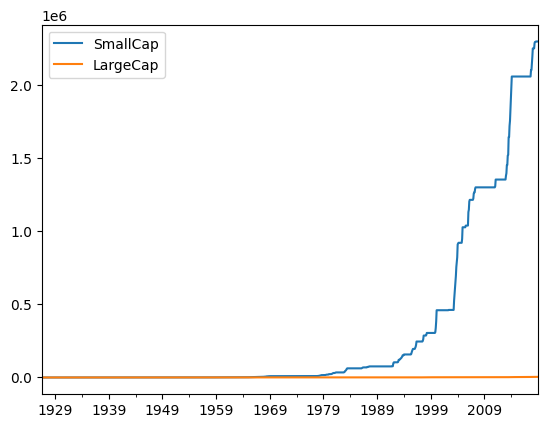

In [18]:
previous_peaks.plot()

In [19]:
drawdowns.min()

SmallCap   -0.833001
LargeCap   -0.840038
dtype: float64

In [21]:
drawdowns['1982':].min()

SmallCap   -0.631207
LargeCap   -0.528095
dtype: float64

In [22]:
drawdowns['1982':].idxmin()

SmallCap    2009-02
LargeCap    2009-02
dtype: period[M]

In [ ]:
# Define a function to compute drawdowns
def drawdowns(rets: pd.DataFrame) -> pd.DataFrame:
    """Compute the drawdowns of a return series."""
    wealth_index = (1 + rets).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    return drawdowns

In [24]:
df = drawdowns(rets)

<Axes: >

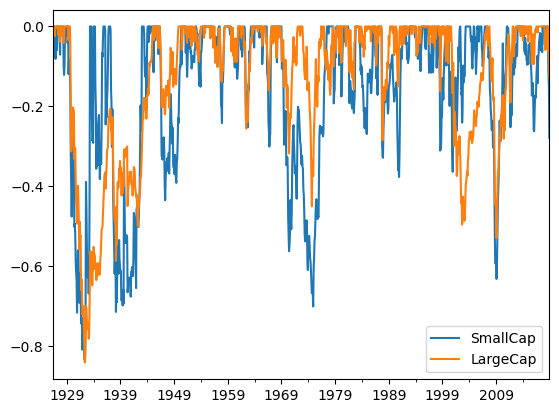

In [26]:
df.plot()